In [15]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
from numba import njit, prange

## Poisson 1D: soluzione = $sin(\pi\,x)$

In [32]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)
    #return -dy_xx + tf.exp(x)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2
    #return np.exp(x)

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

Compiling model...
'compile' took 0.001121 s



Training model...



c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Step      Train loss              Test loss               Test metric   
0         [2.64e+03, 3.09e+00]    [2.25e+03, 3.09e+00]    [1.68e+00]    
1000      [1.50e+01, 7.75e-01]    [1.54e+01, 7.75e-01]    [6.84e-01]    
2000      [5.10e+00, 5.20e-01]    [4.68e+00, 5.20e-01]    [5.28e-01]    
3000      [3.18e+00, 9.68e-02]    [2.84e+00, 9.68e-02]    [2.60e-01]    
4000      [1.82e+00, 3.75e-04]    [1.61e+00, 3.75e-04]    [1.47e-01]    
5000      [8.42e-01, 2.62e-02]    [7.30e-01, 2.62e-02]    [1.74e-01]    
6000      [3.19e-01, 4.60e-02]    [2.72e-01, 4.60e-02]    [1.89e-01]    
7000      [1.03e-01, 2.32e-02]    [8.70e-02, 2.32e-02]    [1.29e-01]    
8000      [2.78e-02, 3.74e-03]    [2.36e-02, 3.74e-03]    [5.16e-02]    
9000      [5.67e-03, 1.11e-04]    [5.15e-03, 1.11e-04]    [9.24e-03]    
10000     [9.42e-04, 3.76e-08]    [9.82e-04, 3.76e-08]    [8.90e-04]    

Best model at step 10000:
  train loss: 9.42e-04
  test loss: 9.82e-04
  test metric: [8.90e-04]

'train' took 7.029778 s



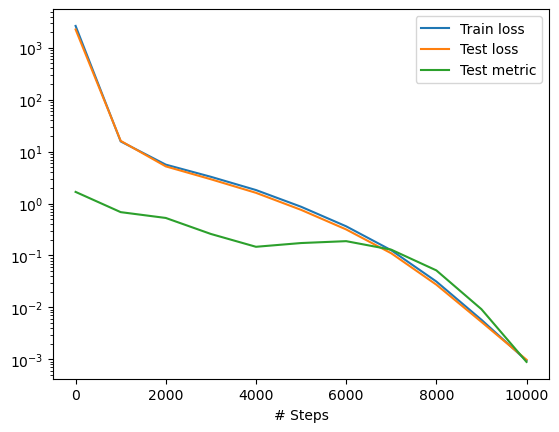

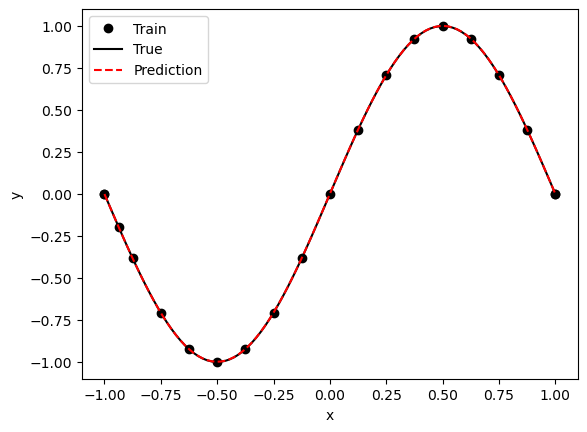

In [37]:
M =10
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"
R = 10
net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [7]:
print(model.train_state.y_train)

[[ 8.7422777e-08]
 [-8.7422777e-08]
 [ 8.7422777e-08]
 [-8.7422777e-08]
 [ 0.0000000e+00]
 [-1.0000000e+00]
 [ 1.0000000e+00]
 [-7.0710677e-01]
 [ 7.0710677e-01]
 [-7.0710677e-01]
 [ 7.0710677e-01]
 [-3.8268328e-01]
 [ 3.8268346e-01]
 [-9.2387950e-01]
 [ 9.2387950e-01]
 [-9.2387950e-01]
 [ 9.2387950e-01]
 [-3.8268346e-01]
 [ 3.8268328e-01]
 [-1.9509031e-01]]


In [4]:
pi = np.pi
history = {}
rr = [0.5, 1, 3, 4, 5, 6]

M = 200
layer_size = [1] + [M]  + [1]
activation = ["sin", 'linear']
initializer = "Glorot uniform"
loss = {}
epochs = {}
metric = {}
for i in rr:
    print(i)
    ll = []

    net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=i)

    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])

    losshistory, train_state = model.train(iterations=50000)
    
    loss_test = losshistory.loss_test
    epochs[i] = losshistory.steps
    metric[i] = losshistory.metrics_test
    for j in range(np.shape(loss_test)[0]):
        ll.append(loss_test[j][0])
    loss[i] = ll

0.5
Compiling model...
'compile' took 0.002841 s

Training model...



c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Step      Train loss              Test loss               Test metric   
0         [4.32e+01, 1.41e-01]    [4.88e+01, 1.41e-01]    [7.83e-01]    
1000      [3.00e+01, 4.85e-02]    [3.32e+01, 4.85e-02]    [6.83e-01]    
2000      [2.45e+01, 1.16e-02]    [2.51e+01, 1.16e-02]    [6.07e-01]    
3000      [2.30e+01, 1.28e-03]    [2.15e+01, 1.28e-03]    [5.60e-01]    
4000      [2.27e+01, 2.15e-05]    [2.03e+01, 2.15e-05]    [5.40e-01]    
5000      [2.27e+01, 3.02e-06]    [2.01e+01, 3.02e-06]    [5.36e-01]    
6000      [2.27e+01, 4.23e-06]    [2.01e+01, 4.23e-06]    [5.36e-01]    
7000      [2.27e+01, 3.94e-06]    [2.01e+01, 3.94e-06]    [5.36e-01]    
8000      [2.27e+01, 3.70e-06]    [2.00e+01, 3.70e-06]    [5.36e-01]    
9000      [2.27e+01, 3.51e-06]    [2.00e+01, 3.51e-06]    [5.35e-01]    
10000     [2.27e+01, 3.31e-06]    [2.00e+01, 3.31e-06]    [5.35e-01]    
11000     [2.27e+01, 2.96e-06]    [2.00e+01, 2.96e-06]    [5.35e-01]    
12000     [2.26e+01, 3.33e-06]    [2.00e+01, 3.33e-

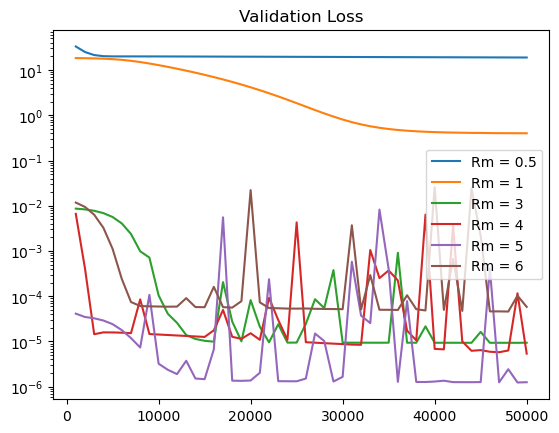

In [5]:
for i in loss:
    plt.plot(epochs[i][1:], loss[i][1:], label = 'Rm = ' + str(i))
plt.yscale('log')
plt.title('Validation Loss')
plt.legend()
plt.show()

## Poisson 1D: soluzione = $sin(3\pi\,x + \frac{3\pi}{20}) * cos(2\pi\,x + \frac{\pi}{10}) + 2$


In [8]:
pi = np.pi
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    #return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    #return np.sin(np.pi * x)
    return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
num_points = 80
num_validation = 400
data = dde.data.PDE(geom, pde, bc, num_points, 2, solution=func, num_test=num_validation)

Compiling model...
'compile' took 0.000308 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [3.63e+04, 2.88e+00]    [3.72e+04, 2.88e+00]    [1.10e+00]    
1000      [3.81e+03, 5.26e-01]    [3.81e+03, 5.26e-01]    [5.74e-01]    
2000      [3.78e+03, 4.77e-02]    [3.80e+03, 4.77e-02]    [3.39e-01]    
3000      [3.77e+03, 8.85e-04]    [3.78e+03, 8.85e-04]    [2.55e-01]    
4000      [3.75e+03, 6.53e-04]    [3.77e+03, 6.53e-04]    [2.43e-01]    
5000      [3.72e+03, 4.63e-06]    [3.74e+03, 4.63e-06]    [2.41e-01]    
6000      [3.70e+03, 1.14e-04]    [3.72e+03, 1.14e-04]    [2.40e-01]    
7000      [3.68e+03, 3.16e-04]    [3.69e+03, 3.16e-04]    [2.40e-01]    
8000      [3.66e+03, 4.11e-05]    [3.67e+03, 4.11e-05]    [2.39e-01]    
9000      [3.64e+03, 2.20e-04]    [3.65e+03, 2.20e-04]    [2.38e-01]    
10000     [3.61e+03, 8.15e-06]    [3.63e+03, 8.15e-06]    [2.37e-01]    
11000     [3.64e+03, 7.11e-04]    [3.67e+03, 7.11e-04]    [

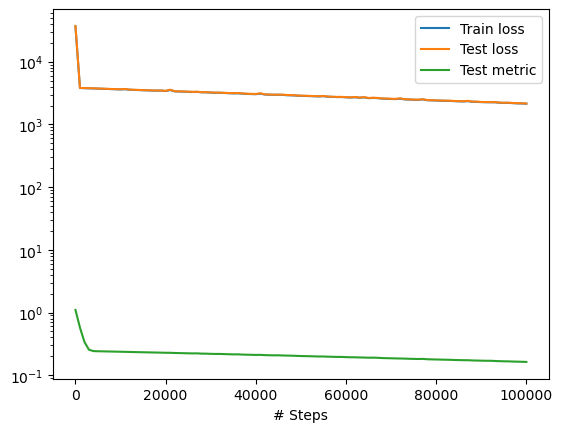

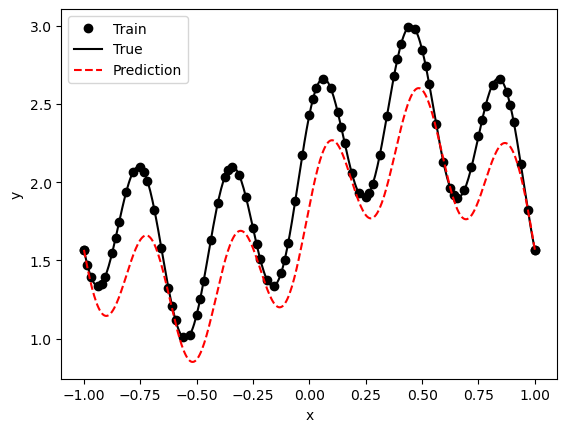

In [10]:
M =3200
layer_size = [1] + [M] + [1]
activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=20)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=100000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)


Compiling model...
'compile' took 0.000393 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [7.83e+03, 3.05e+00]    [8.07e+03, 3.05e+00]    [1.11e+00]    
1000      [7.92e-01, 4.52e-02]    [4.52e+03, 4.52e-02]    [3.59e-01]    
2000      [7.72e-01, 1.80e-04]    [4.47e+03, 1.80e-04]    [2.99e-01]    
3000      [2.96e-01, 1.69e-05]    [4.31e+03, 1.69e-05]    [3.10e-01]    
4000      [1.59e-02, 4.84e-05]    [4.17e+03, 4.84e-05]    [3.24e-01]    
5000      [1.55e-01, 1.14e-04]    [4.12e+03, 1.14e-04]    [3.36e-01]    
6000      [4.18e-01, 3.87e-05]    [4.07e+03, 3.87e-05]    [3.51e-01]    
7000      [5.68e-01, 4.64e-06]    [3.98e+03, 4.64e-06]    [3.65e-01]    
8000      [7.83e-01, 1.91e-05]    [3.90e+03, 1.91e-05]    [3.77e-01]    
9000      [1.18e-01, 1.40e-05]    [3.72e+03, 1.40e-05]    [3.90e-01]    
10000     [1.36e+00, 1.67e-05]    [3.57e+03, 1.67e-05]    [3.98e-01]    
11000     [7.26e-01, 2.10e-05]    [3.45e+03, 2.10e-05]    [

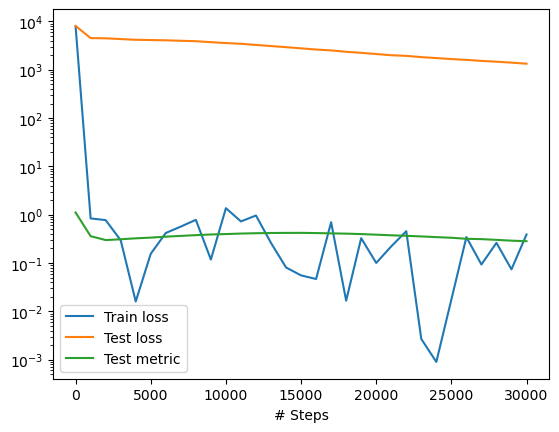

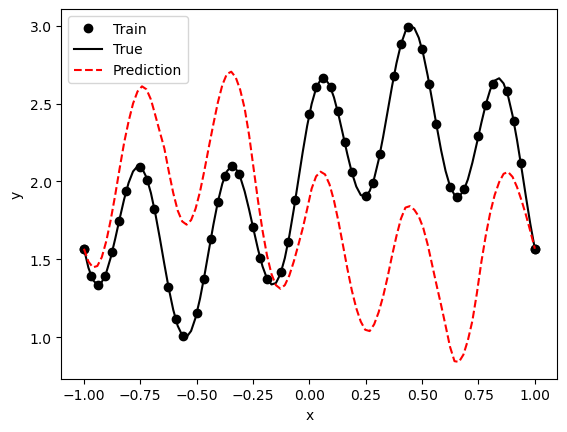

In [9]:
M =200
layer_size = [1] + [M] + [100] + [1]
activation = ["sin", 'sigmoid','linear']

initializer = "Glorot uniform"

net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=30000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

## Partition of Unit

In [15]:
def pou(N, dim, x, solution, boundary, pde, num_train=15, num_boundary=2, num_validation=100, M=50, Rm=10, iter=20000):

    geom, bc, data = np.empty(N, dtype=object), np.empty(N, dtype=object), np.empty(N, dtype=object)
    
    layer_size = [1] + [M]  +  [1]
    activation = ["sin", 'linear']
    initializer = "Glorot uniform"

    model, net = np.empty(N, dtype=object), np.empty(N, dtype=object)
    losshistory, train_state = np.empty(N, dtype=object), np.empty(N, dtype=object)

    if dim == 1:
        xx = np.linspace(x[0], x[1], N+1)
        for i in prange(N):
            
            geom[i] = dde.geometry.Interval(xx[i], xx[i+1])
            bc[i] = dde.icbc.DirichletBC(geom[i], solution, boundary)
            data[i] = dde.data.PDE(geom[i], pde, bc[i], num_train, num_boundary, solution=solution, num_test=num_validation)

            net[i] = dde.nn.random_FNN(layer_size, activation, initializer, Rm=Rm)

            model[i] = dde.Model(data[i], net[i])

            model[i].compile("adam", lr=0.001, metrics=["l2 relative error"])

            losshistory[i], train_state[i] = model[i].train(iterations=iter)

    return model, losshistory, train_state, geom


def pou_visualization(losses, train_state):
    N = np.shape(train_state)[0]
    xtest, ytest, ypred = np.empty(N, dtype=object), np.empty(N, dtype=object), np.empty(N, dtype=object)
    for i in range(N):
        xtest[i], ytest[i], ypred[i] = train_state[i].X_test, train_state[i].y_test, train_state[i].y_pred_test

        u = xtest[i][1]
        xtest[i] = np.delete(xtest[i], 1)
        xtest[i] = np.append(xtest[i], u)

        uu = ytest[i][1]
        ytest[i] = np.delete(ytest[i], 1)
        ytest[i] = np.append(ytest[i], uu)

        uuu = ypred[i][1]
        ypred[i] = np.delete(ypred[i], 1)
        ypred[i] = np.append(ypred[i], uuu)

        #plt.scatter(xtest[i], ytest[i], c='black')
        plt.plot(xtest[i], ytest[i], c='black')
        plt.plot(xtest[i], ypred[i], c='red', ls = '--')
    
    plt.show()

    steps = losses[0].steps
    time = np.shape(steps)[0]
    max_train, max_test = np.zeros(time), np.zeros(time)

    for j in range(time):
        for i in range(N):
            train, test = losses[i].loss_test, losses[i].loss_train

            if train[j][0] > max_train[j]:
                max_train[j] = train[j][0]

            if test[j][0] > max_test[j]:
                max_test[j] = test[j][0]
    
    plt.plot(steps, max_train, c='orange', label='training loss')
    plt.plot(steps, max_test, c='green', label='validation loss')
    plt.yscale('log')
    plt.legend()
    plt.show()


In [19]:
model, loss, train, geom = pou(4, 1, [-1, 1], func, boundary, pde, iter=100000, M=400)

Compiling model...
'compile' took 0.000392 s

Training model...



c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Step      Train loss              Test loss               Test metric   
0         [2.45e+04, 1.22e-01]    [2.43e+04, 1.22e-01]    [1.48e+00]    
1000      [1.30e+03, 2.44e+01]    [1.04e+03, 2.44e+01]    [1.83e+00]    
2000      [9.42e+02, 5.47e+00]    [7.64e+02, 5.47e+00]    [1.22e+00]    
3000      [5.76e+02, 1.37e+01]    [4.76e+02, 1.37e+01]    [1.88e+00]    
4000      [3.10e+02, 5.95e+01]    [2.63e+02, 5.95e+01]    [3.29e+00]    
5000      [1.79e+02, 1.13e+02]    [1.55e+02, 1.13e+02]    [4.34e+00]    
6000      [1.35e+02, 1.37e+02]    [1.19e+02, 1.37e+02]    [4.73e+00]    
7000      [1.25e+02, 1.37e+02]    [1.10e+02, 1.37e+02]    [4.72e+00]    
8000      [1.20e+02, 1.31e+02]    [1.06e+02, 1.31e+02]    [4.61e+00]    
9000      [1.16e+02, 1.24e+02]    [1.02e+02, 1.24e+02]    [4.49e+00]    
10000     [1.11e+02, 1.17e+02]    [9.91e+01, 1.17e+02]    [4.36e+00]    
11000     [1.08e+02, 1.10e+02]    [9.60e+01, 1.10e+02]    [4.22e+00]    
12000     [1.04e+02, 1.03e+02]    [9.33e+01, 1.03e+

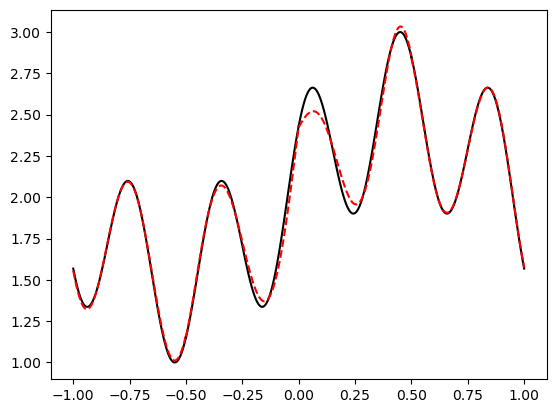

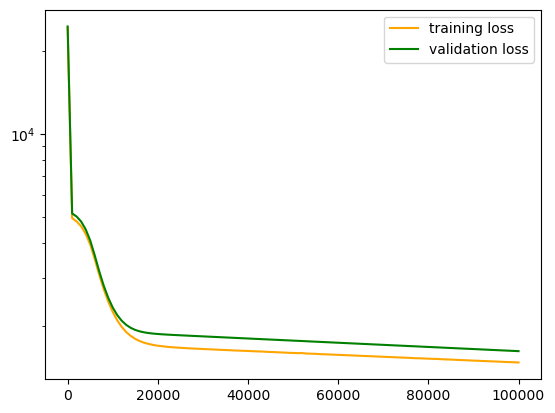

In [20]:
pou_visualization(loss, train)

In [2]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + y - (1 + np.pi ** 2 )* tf.sin(np.pi * x)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

Compiling model...
'compile' took 0.001747 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [1.93e+03, 3.28e-01]    [2.09e+03, 3.28e-01]    [7.22e-01]    
1000      [7.72e+00, 6.10e-03]    [2.79e+00, 6.10e-03]    [1.27e-01]    
2000      [4.79e-01, 3.52e-01]    [1.95e-01, 3.52e-01]    [4.57e-01]    
3000      [3.47e-01, 1.45e-01]    [2.33e-01, 1.45e-01]    [2.94e-01]    
4000      [3.34e-01, 2.72e-02]    [2.59e-01, 2.72e-02]    [1.28e-01]    
5000      [3.22e-01, 3.59e-03]    [2.65e-01, 3.59e-03]    [5.04e-02]    
6000      [2.97e-01, 1.27e-03]    [2.48e-01, 1.27e-03]    [3.42e-02]    
7000      [2.59e-01, 1.01e-03]    [2.17e-01, 1.01e-03]    [3.10e-02]    
8000      [2.06e-01, 8.04e-04]    [1.73e-01, 8.04e-04]    [2.76e-02]    
9000      [1.41e-01, 5.48e-04]    [1.19e-01, 5.48e-04]    [2.27e-02]    
10000     [7.62e-02, 2.90e-04]    [6.49e-02, 2.90e-04]    [1.65e-02]    
11000     [2.76e-02, 9.96e-05]    [2.41e-02, 9.96e-05]    [9.60e-03]    
12000     [5.41e-03, 1.59e-05]  

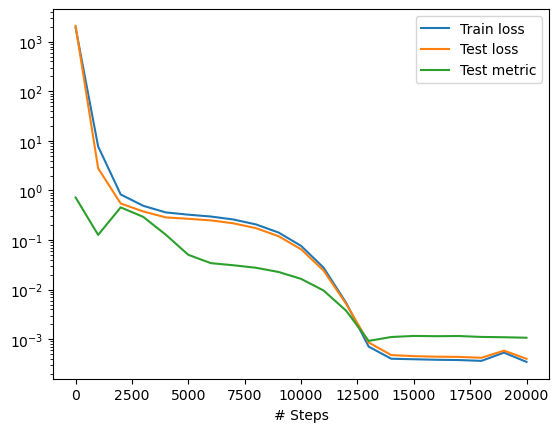

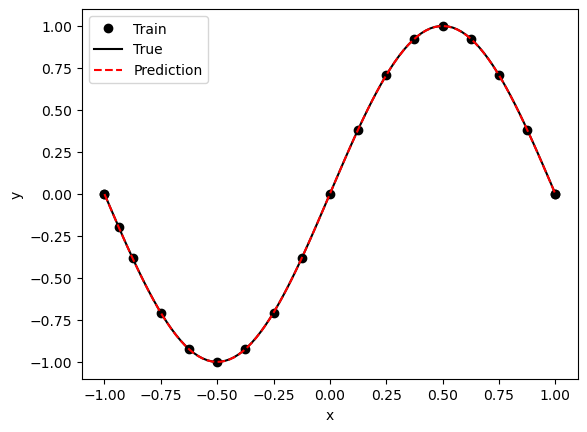

In [25]:
M =10
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
#wei = np.ones(2)
#wei[0] = 0
#wei = tf.convert_to_tensor(wei, dtype=tf.float32)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])#, loss_weights=wei)

losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [1]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
def psi(x):
    ar = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        ar[i] = tf.where(x[i] > 1 or x[i] < -1, 0.0, 1.0)
    return tf.convert_to_tensor(ar)
    #return tf.where(x > 1 or x < -1, 0.0, 1.0)

def indicatrice(a,b):
    return lambda x: psi((2*x-b-a)/(b-a))

#indicatrici = [indicatric(x0, x0+h)]

In [3]:
npart = 2
arr = np.linspace(-1, 1, npart + 1)

nn_indicatrici = [indicatrice(arr[i], arr[i+1]) for i in range(npart)]


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

Compiling model...
'compile' took 0.000624 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [6.77e+03, 1.35e+00]    [6.41e+03, 1.35e+00]    [1.59e+00]    
1000      [5.26e+01, 1.18e+01]    [4.80e+01, 1.18e+01]    [2.61e+00]    
2000      [2.87e+01, 1.88e-02]    [2.21e+01, 1.88e-02]    [1.58e-01]    
3000      [1.74e+01, 2.62e-01]    [1.32e+01, 2.62e-01]    [3.85e-01]    
4000      [7.98e+00, 1.46e-01]    [6.09e+00, 1.46e-01]    [2.89e-01]    
5000      [2.22e+00, 4.27e-02]    [1.75e+00, 4.27e-02]    [1.57e-01]    
6000      [2.82e-01, 5.20e-03]    [2.48e-01, 5.20e-03]    [5.51e-02]    
7000      [2.45e-02, 1.36e-04]    [2.98e-02, 1.36e-04]    [9.32e-03]    
8000      [1.63e-02, 9.22e-08]    [1.81e-02, 9.22e-08]    [9.60e-04]    
9000      [1.58e-02, 9.26e-07]    [1.73e-02, 9.26e-07]    [9.93e-04]    
10000     [1.50e-02, 8.91e-07]    [1.65e-02, 8.91e-07]    [9.87e-04]    
11000     [1.39e-02, 9.20e-07]    [1.52e-02, 9.20e-07]    [8.73e-04]    
12000     [1.67e-02, 4.10e-08]  

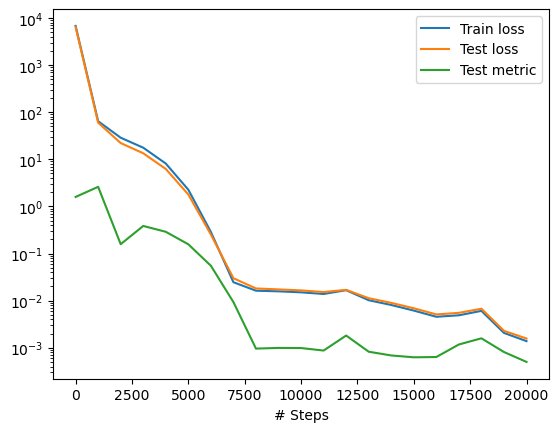

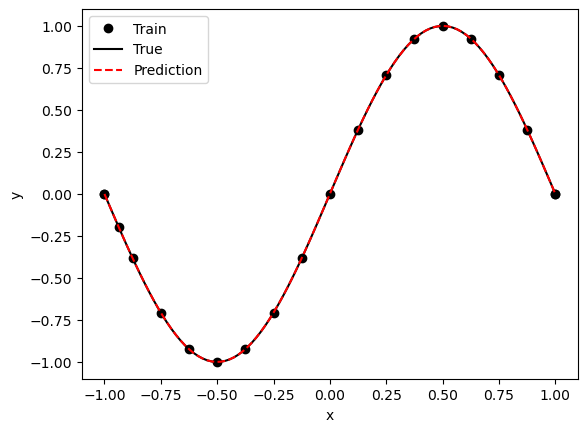

In [5]:
M =10
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.partioned_random_FNN(layer_size, activation, initializer, npart, nn_indicatrici, Rm=10)

model = dde.Model(data, net)
#wei = np.ones(2)
#wei[0] = 0
#wei = tf.convert_to_tensor(wei, dtype=tf.float32)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])#, loss_weights=wei)

losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
'compile' took 0.000645 s



Training model...



c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Step      Train loss              Test loss               Test metric   
0         [3.99e+02, 2.82e-01]    [4.77e+02, 2.82e-01]    [1.12e+00]    
1000      [4.09e+01, 1.47e-02]    [4.53e+01, 1.47e-02]    [9.84e-01]    
2000      [4.09e+01, 1.49e-02]    [4.52e+01, 1.49e-02]    [9.83e-01]    
3000      [4.08e+01, 1.50e-02]    [4.51e+01, 1.50e-02]    [9.83e-01]    
4000      [4.08e+01, 1.50e-02]    [4.51e+01, 1.50e-02]    [9.83e-01]    
5000      [4.08e+01, 1.49e-02]    [4.50e+01, 1.49e-02]    [9.82e-01]    
6000      [4.08e+01, 1.47e-02]    [4.49e+01, 1.47e-02]    [9.82e-01]    
7000      [4.08e+01, 1.45e-02]    [4.49e+01, 1.45e-02]    [9.82e-01]    
8000      [4.08e+01, 1.41e-02]    [4.49e+01, 1.41e-02]    [9.82e-01]    
9000      [4.08e+01, 1.35e-02]    [4.49e+01, 1.35e-02]    [9.82e-01]    
10000     [4.08e+01, 1.26e-02]    [4.50e+01, 1.26e-02]    [9.81e-01]    

Best model at step 10000:
  train loss: 4.08e+01
  test loss: 4.51e+01
  test metric: [9.81e-01]

'train' took 39.440423 s


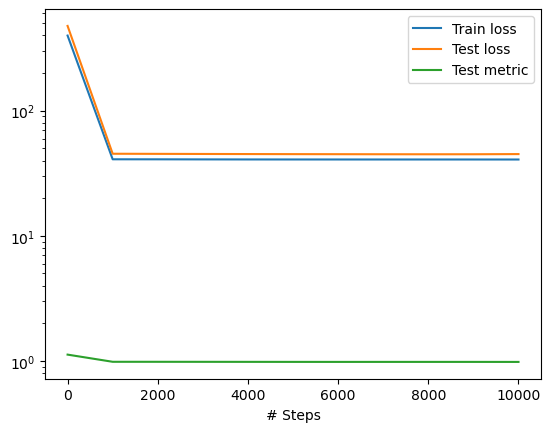

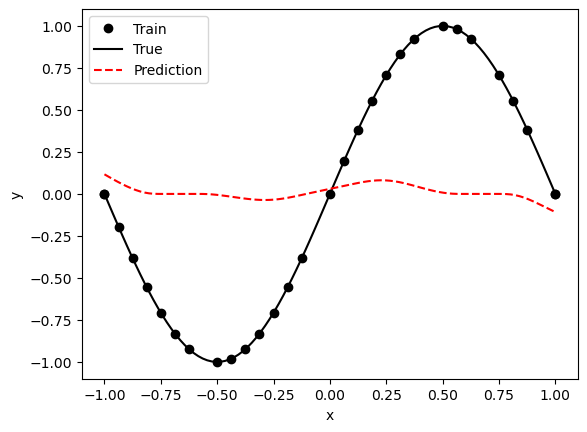

In [11]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

c1 = - 0.16171875
def func_dx(x, a=0):
    res = (c1 + 1/5*(x-a)**5 - (x-a)**4 + 47/24*(x-a)**3 - 15/8*(x-a)**2 + 225/256*(x-a))/0.001041666666667
    return res

c2 =  0.1627604166666665
def func_sx(x, a=0):
    res = (c2 + 1/5*(x-a)**5 + (x-a)**4 + 47/24*(x-a)**3 + 15/8*(x-a)**2 + 225/256*(x-a))/0.001041666666666
    return res

def pou(x, spost=0, tot=2):
    return tf.clip_by_value(1-func_dx(x, spost - tot), 0.0, 1.0) + tf.clip_by_value(func_sx(x, spost), 0.0, 1.0) - 1

def pou_dx(x, spost=0, tot=2):
    return tf.clip_by_value(func_dx(x, spost-tot), 0.0, 1.0)

def pou_sx(x, spost=0, tot=2):
    return tf.clip_by_value(1-func_sx(x, spost), 0.0, 1.0)

npart = 3

a, b = -1, 1
arr = np.linspace(a, b, npart+1)
total = b - a - (arr[-1] - arr[-2])

nn_indicatrici = []

nn_indicatrici = [lambda xx: pou_sx(xx, spost=0, tot=total)]

spostamento = [(arr[-1] - arr[-2])*i for i in range(npart)]
#spostamento.insert(0, 0)
#spostamento.append(0)

for i in range(0, npart):
    #spostamento = (arr[-1] - arr[-2])*i
    '''
    sx = np.linspace(-1.5 + spostamento, -0.5 + spostamento)
    dx = np.linspace(0.5 + spostamento - total, 1.5 + spostamento - total)

    plt.plot(sx, func_sx(sx, spostamento))
    plt.plot(dx, 1-func_dx(dx, +spostamento - total))
    plt.show()
    '''
    nn_indicatrici.append(lambda xx: pou(xx, spost=spostamento[i], tot=total))

nn_indicatrici.append(lambda xx: pou_dx(xx, spost=0, tot=0))

spostamento.insert(0, 0)
spostamento.append(0)
'''
if npart == 1:
    nn_indicatrici = [lambda x: 1.0]
else:
    arr = np.linspace(-1, 1, npart + 1)

    nn_indicatrici = []
    nn_indicatrici.append(lambda x: func_sx((2*x-arr[1]-arr[0])/(arr[1]-arr[0])))
    for i in range(1, npart-1):
        nn_indicatrici.append(lambda x: pou((2*x-arr[i+1]-arr[i])/(arr[i+1]-arr[i])))
    nn_indicatrici.append(lambda x: func_dx((2*x-arr[-1]-arr[-2])/(arr[-1]-arr[-2])))
'''


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 26, 2, solution=func, num_test=100)

M = 30
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.partioned_random_FNN(layer_size, activation, initializer, npart, nn_indicatrici, Rm=10)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])#, loss_weights=wei)

losshistory, train_state = model.train(iterations=10000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

3
(5,)


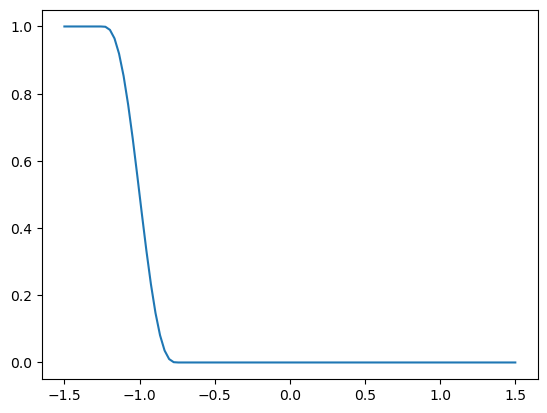

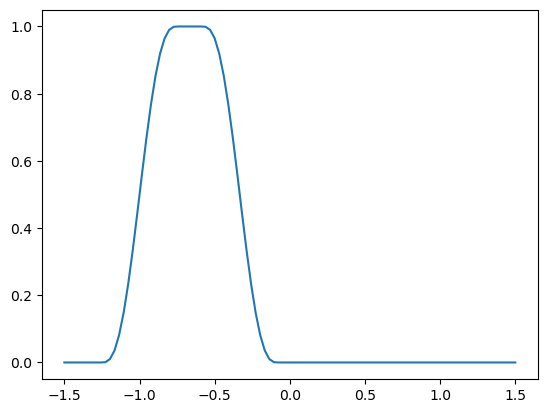

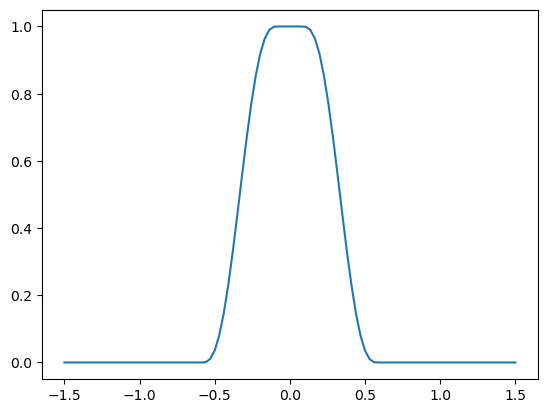

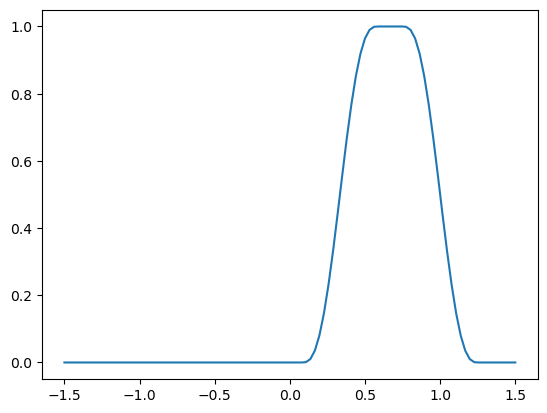

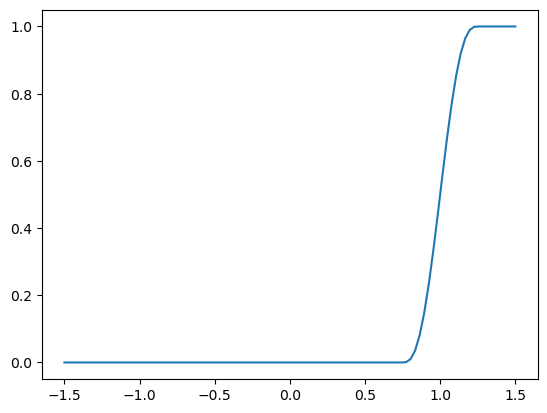

tf.Tensor(
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.], shape=(100,), dtype=float64)


In [14]:
xx = np.linspace(-1.5, 1.5, 100)
sum = np.zeros(xx.shape)
print(npart)
print(np.shape(nn_indicatrici))
for i in range(npart+2):
    sum += nn_indicatrici[i](xx)
    plt.plot(xx, nn_indicatrici[i](xx))
    plt.show()
print(sum)

tf.Tensor([1.       0.984375 0.725375 0.578125 0.142625], shape=(5,), dtype=float64)
tf.Tensor([0.       0.578125 0.957125 0.      ], shape=(4,), dtype=float64)


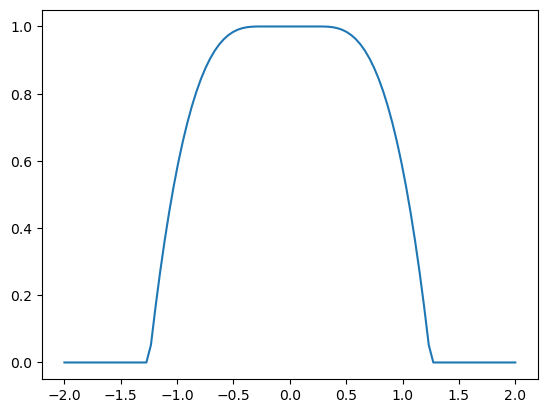

In [138]:
import tensorflow
x = np.array([0, 0.5, 0.9, 1, 1.2], dtype='float64')
x = tf.convert_to_tensor(x)
pi = np.pi


def sin1(x):
    return (1 + tf.sin(2*pi*x))/2

def sin2(x):
    return (1 - tf.sin(2*pi*x))/2

@tf.function
def psi(x):
    return (tf.clip_by_value(sin1(x), 0.0, 1.0)*tf.where(x<-3/4, 1.0, 0.0)*tf.where(x>-5/4, 1.0, 0.0) 
            + tf.clip_by_value(1-sin2(x), 0.0, 1.0)*tf.where(x<5/4, 1.0, 0.0)*tf.where(x>3/4, 1.0, 0.0) - 1)#*tf.where(x>-5/4, 1.0, 0.0)*tf.where(x<5/4, 1.0, 0.0)

@tf.function
def clip_value(x, a=1, b=0):
    return tf.clip_by_value(a*x+b, 0, 1) * tf.clip_by_value(1-(a*x+b), 0, 1)

@tf.function
def psi(x, a=1, b=0):
    return 16*(clip_value(x, a, b))**2#/(clip_value(0.5,a,b)**2)


#print(tf.clip_by_value(sin1(x), 0, 1))
#print(tf.clip_by_value(sin2(x), 0, 1))


def psi1(x):
    return tf.clip_by_value(1 + (0.25 + x)**3, 0.0, 1.0) + tf.clip_by_value(1 - (x - 0.25)**3, 0.0, 1.0) - 1

def indicatrice(a,b):
    return lambda x: psi1((2*x-b-a)/(b-a))

print(psi1(x))

xx = np.linspace(-2, 2, 100)
xx = tf.convert_to_tensor(xx)
plt.plot(xx, psi1(xx))

x1 = np.array([1, 0.5, 0.4, 0.6])
x1 = tf.convert_to_tensor(x1)
print(indicatrice(0,0.5)(x1))

In [58]:
print(tf.clip_by_value(sin1(x), 0, 1))

tf.Tensor([0.5        0.49999997 0.20610735 0.50000006 0.97552836], shape=(5,), dtype=float32)


In [124]:
@tf.function
def phi(x):

    res = tf.where(x<3/4, 1.0, 0.0)*tf.where(x>-3/4, 1.0, 0.0) \
        + (1 + tf.sin(2*pi*x))/2 * tf.where(x<-3/4, 1.0, 0.0) * tf.where(x>-5/4, 1.0, 0.0) \
        + (1 - tf.sin(2*pi*x))/2 * tf.where(x<5/4, 1.0, 0.0) * tf.where(x>3/4, 1.0, 0.0) 

    return res

xx = np.array([-1.0, -0.5, 0.5, 1.0, 1.5], dtype='float32')
xx = tf.convert_to_tensor(xx)

print(phi(xx))

tf.Tensor([0.4999999 1.        1.        0.4999999 0.       ], shape=(5,), dtype=float32)


tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)


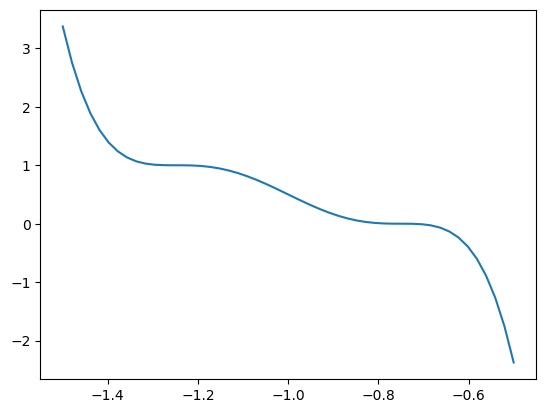

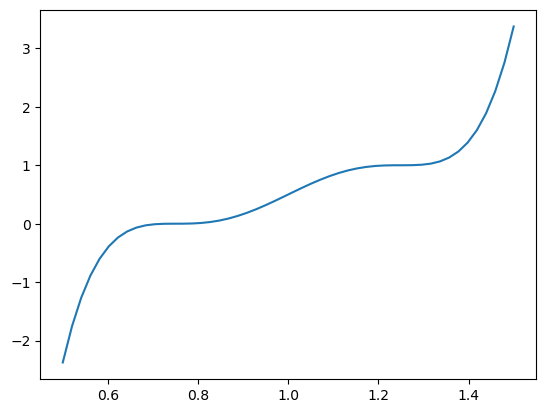

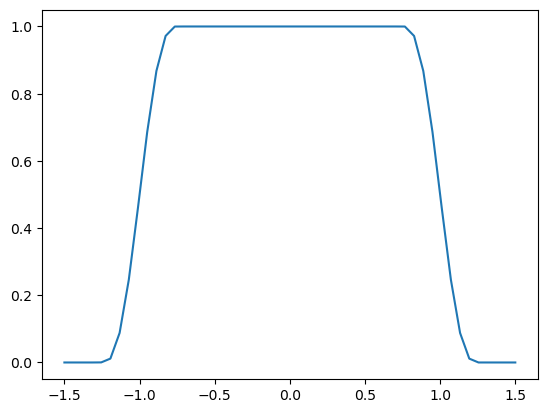

In [218]:
c1 = - 0.16171875
def func_dx(x):
    res = (c1 + 1/5*x**5 - x**4 + 47/24*x**3 - 15/8*x**2 + 225/256*x)/0.001041666666667
    return res

c2 =  0.1627604166666665
def func_sx(x):
    res = (c2 + 1/5*x**5 + x**4 + 47/24*x**3 + 15/8*x**2 + 225/256*x)/0.001041666666666
    return res

def pou(x):
    return tf.clip_by_value(1-func_dx(x), 0.0, 1.0) + tf.clip_by_value(func_sx(x), 0.0, 1.0) - 1
dx = np.linspace(0.5, 1.5, dtype='float32')
sx = np.linspace(-1.5, -0.5, dtype='float32')


y = np.array([-0.2, 0.0, 0.2], dtype='float32')
y = tf.convert_to_tensor(y)
print(pou(y))
xx = np.linspace(-1.5, 1.5, dtype='float32')
xx = tf.convert_to_tensor(xx)
plt.plot(sx, 1-func_sx(sx))
plt.show()
plt.plot(dx, func_dx(dx))
plt.show()
plt.plot(xx, pou(xx))

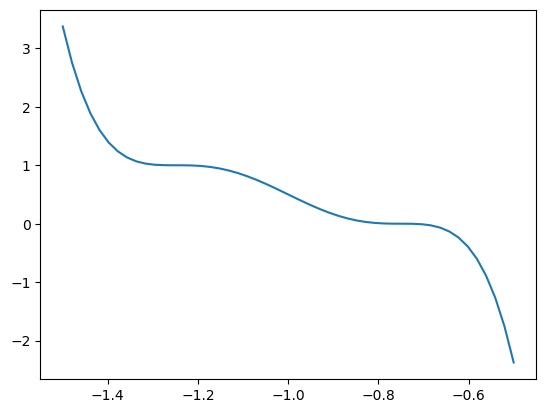

In [196]:

plt.plot(sx, 1-func_sx(sx))

1.0
[0.0, 1.0]


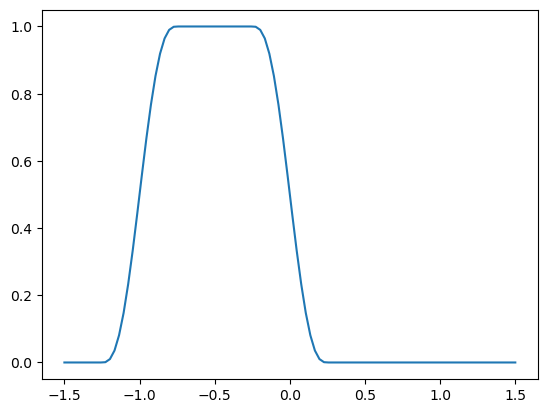

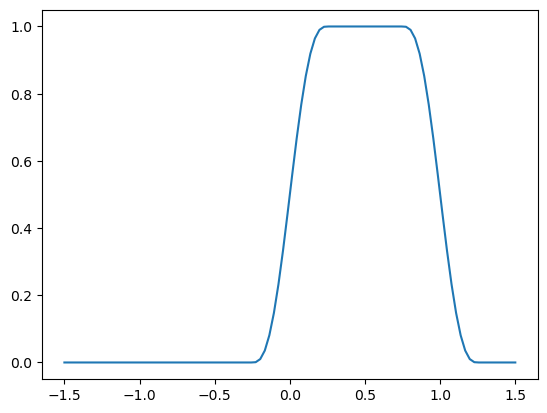

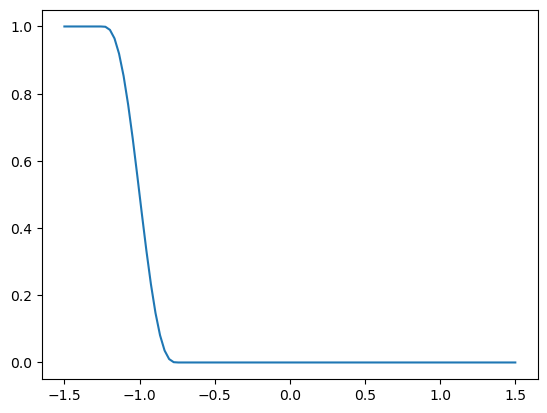

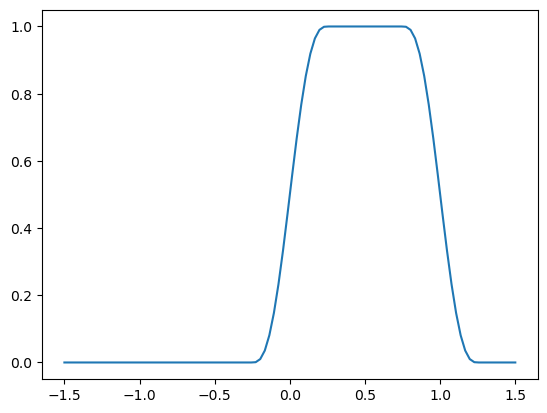

IndexError: list index out of range

In [3]:
c1 = - 0.16171875
def func_dx(x, a=0):
    res = (c1 + 1/5*(x-a)**5 - (x-a)**4 + 47/24*(x-a)**3 - 15/8*(x-a)**2 + 225/256*(x-a))/0.001041666666667
    return res

c2 =  0.1627604166666665
def func_sx(x, a=0):
    res = (c2 + 1/5*(x-a)**5 + (x-a)**4 + 47/24*(x-a)**3 + 15/8*(x-a)**2 + 225/256*(x-a))/0.001041666666666
    return res

def pou(x, spost=0, tot=2):
    return tf.clip_by_value(1-func_dx(x, spost - tot), 0.0, 1.0) + tf.clip_by_value(func_sx(x, spost), 0.0, 1.0) - 1

def pou_dx(x, spost=0, tot=2):
    return tf.clip_by_value(func_dx(x, spost-tot), 0.0, 1.0)

def pou_sx(x, spost=0, tot=2):
    return tf.clip_by_value(1-func_sx(x, spost), 0.0, 1.0)

npart = 2
a, b = -1, 1
arr = np.linspace(a, b, npart+1)
total = b - a - (arr[-1] - arr[-2])
print((arr[-1] - arr[-2]))
xx = np.linspace(-1.5, 1.5, 100)
ind = [lambda x: pou_sx(x, spost=0, tot=total)]
#plt.plot(xx, pou_sx(xx, spost=0, tot=total))
#plt.show()
spost = [(arr[-1] - arr[-2])*i for i in range(npart)]
print(spost)
#spost.append(1.5)
#spost.insert(0, 0)
for i in range(0, npart):
    #spostamento = (arr[-1] - arr[-2])*i
    
    '''sx = np.linspace(-1.5 + spost[i], -0.5 + spost[i])
    dx = np.linspace(0.5 + spost[i] - total, 1.5 + spost[i] - total)'''

    '''plt.plot(sx, func_sx(sx, spostamento))
    plt.plot(dx, 1-func_dx(dx, +spostamento - total))
    plt.show()'''
    
    ind.append(lambda x: pou(x, spost=spost[i], tot=total))

    plt.plot(xx, pou(xx, spost=spost[i], tot=total))
    plt.show()
ind.append(lambda x: pou_dx(x, spost=0, tot=0))
#plt.plot(xx, pou_dx(xx, spost=0, tot=0))
#plt.show()

sum = np.zeros(xx.shape)

for i in range(npart+2):
    plt.plot(xx, ind[i](xx))
    plt.show()
    sum += ind[i](xx)
print(sum)
